In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('ncr_ride_bookings.csv')  

print(df.head())
print(df.info())
print(df.describe())

         Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0  ...         

In [11]:
df['date'] = pd.to_datetime(df['Date'])

In [12]:
df = df.dropna(subset=['Date','Time','Booking Status','Vehicle Type','Pickup Location','Drop Location','Booking Value','Ride Distance','Driver Ratings','Customer Rating','Payment Method']
)


In [13]:
df = df.drop_duplicates()

In [14]:
print(df.head())
print(df.info())
print(df.describe())

         Date      Time    Booking ID Booking Status   Customer ID  \
2  2024-08-23  08:56:10  "CNR8494506"      Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"      Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"      Completed  "CID9933542"   
5  2024-02-06  09:44:56  "CNR4096693"      Completed  "CID4670564"   
6  2024-06-17  15:45:58  "CNR2002539"      Completed  "CID6800553"   

    Vehicle Type      Pickup Location  Drop Location  Avg VTAT  Avg CTAT  ...  \
2           Auto              Khandsa  Malviya Nagar      13.4      25.8  ...   
3  Premier Sedan  Central Secretariat       Inderlok      13.1      28.5  ...   
4           Bike     Ghitorni Village    Khan Market       5.3      19.6  ...   
5           Auto                AIIMS    Narsinghpur       5.1      18.1  ...   
6        Go Mini             Vaishali   Punjabi Bagh       7.1      20.4  ...   

   Cancelled Rides by Driver Driver Cancellation Reason  Incomplete Rides  \
2              

In [ ]:

df = df.drop(columns=[
    'Cancelled Rides by Customer',
    'Reason for cancelling by Customer',
    'Cancelled Rides by Driver',
    'Driver Cancellation Reason',
    'Incomplete Rides',
    'Incomplete Rides Reason'
])

print(df.columns)


Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings',
       'Customer Rating', 'Payment Method', 'date'],
      dtype='object')


rides_per_month
month_name
January      7951
February     7368
March        7954
April        7632
May          7905
June         7757
July         7926
August       7780
September    7542
October      7905
November     7659
December     7621
Name: Booking ID, dtype: int64

 rides_per_day
day
Monday       13318
Tuesday      13171
Wednesday    13296
Thursday     13206
Friday       13253
Saturday     13442
Sunday       13314
Name: Booking ID, dtype: int64


C:\Users\thela\AppData\Local\Temp\ipykernel_21388\2171023610.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rides_per_month.index, y=rides_per_month.values, palette="Blues_d")


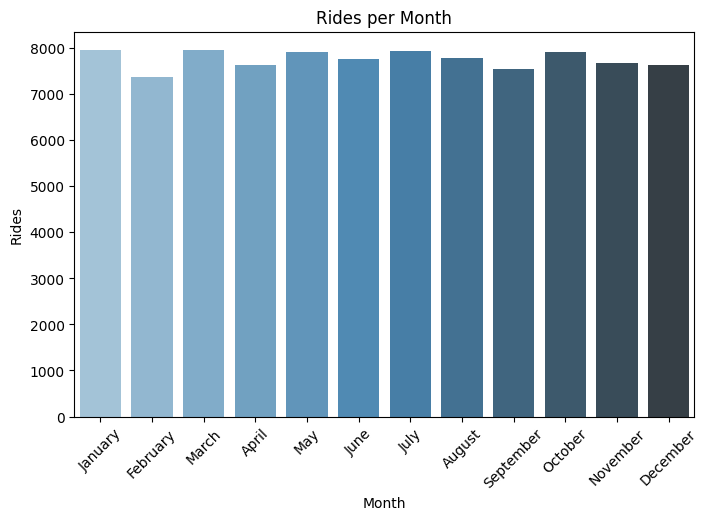

C:\Users\thela\AppData\Local\Temp\ipykernel_21388\2171023610.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rides_per_day.index, y=rides_per_day.values, palette="Greens_d")


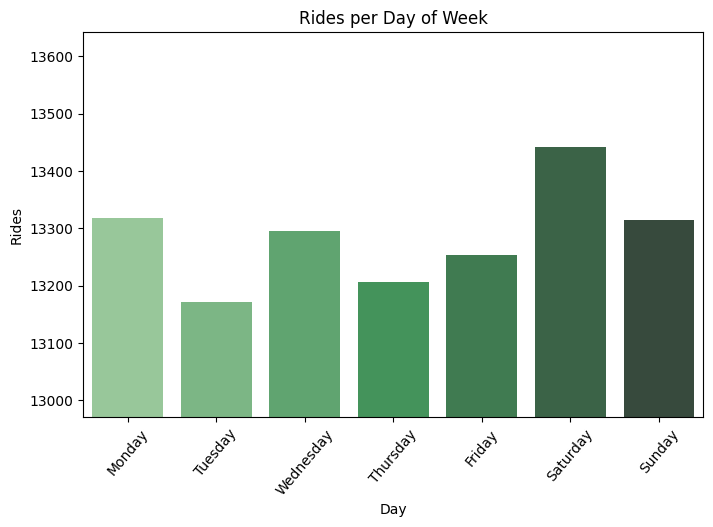

In [44]:
import calendar

# إضافة عمود الشهر بالاسم
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()

df['day'] = df['date'].dt.day_name()

# عدد الرحلات لكل شهر
rides_per_month = df.groupby('month_name')['Booking ID'].count().reindex(
    list(calendar.month_name)[1:]  # ترتيب الأشهر من Jan → Dec
)

# عدد الرحلات لكل يوم
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rides_per_day = df.groupby('day')['Booking ID'].count().reindex(days_order)

print("rides_per_month")
print(rides_per_month)

print("\n rides_per_day")
print(rides_per_day)

# 🎨 رسم بياني للرحلات حسب الأشهر
plt.figure(figsize=(8,5))
sns.barplot(x=rides_per_month.index, y=rides_per_month.values, palette="Blues_d")
plt.title("Rides per Month")
plt.xlabel("Month")
plt.ylabel("Rides")
plt.xticks(rotation=45)
plt.show()

# 🎨 رسم بياني للرحلات حسب الأيام
plt.figure(figsize=(8,5))
sns.barplot(x=rides_per_day.index, y=rides_per_day.values, palette="Greens_d")
plt.title("Rides per Day of Week")
plt.xlabel("Day")
plt.ylabel("Rides")
plt.xticks(rotation=50)
min_rides = rides_per_day.min()
max_rides = rides_per_day.max()
plt.ylim(min_rides - 200, max_rides + 200)
plt.show()


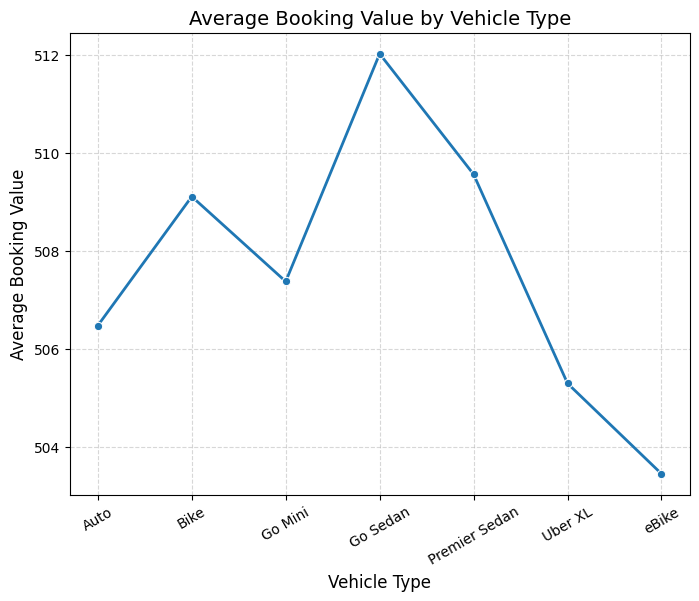

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# نحسب المتوسط من البيانات
avg_booking = df.groupby('Vehicle Type')['Booking Value'].mean().reset_index()

# نرسم خط بياني يوضح الفروقات
plt.figure(figsize=(8,6))
sns.lineplot(x='Vehicle Type', y='Booking Value', data=avg_booking, marker='o', linewidth=2)

plt.title("Average Booking Value by Vehicle Type", fontsize=14)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Average Booking Value", fontsize=12)
plt.xticks(rotation=30)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


C:\Users\thela\AppData\Local\Temp\ipykernel_21388\1884501878.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Pickup Location', x='Count', data=top_pickup, palette="Blues_d")


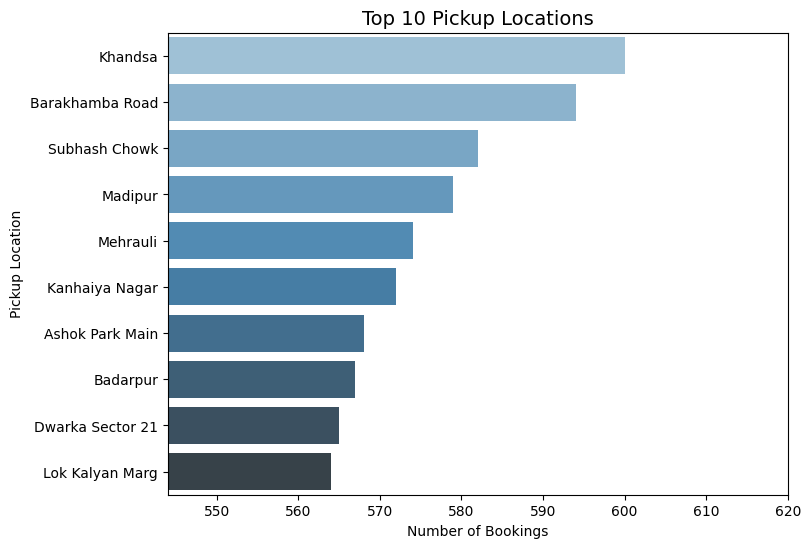

C:\Users\thela\AppData\Local\Temp\ipykernel_21388\1884501878.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Drop Location', x='Count', data=top_drop, palette="Greens_d")


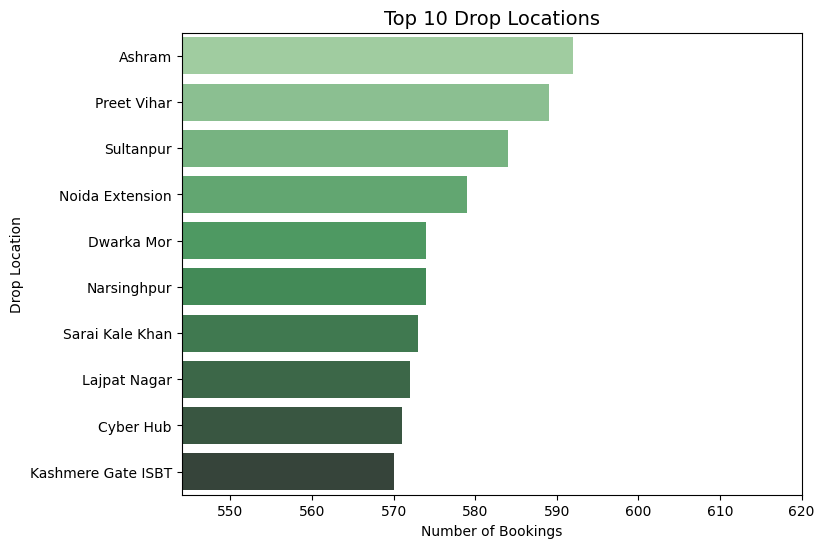

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Pickup locations
top_pickup = df['Pickup Location'].value_counts().nlargest(10).reset_index()
top_pickup.columns = ['Pickup Location', 'Count']

plt.figure(figsize=(8,6))
sns.barplot(y='Pickup Location', x='Count', data=top_pickup, palette="Blues_d")
plt.xlim(top_pickup['Count'].min() - 20, top_pickup['Count'].max() + 20)
plt.title("Top 10 Pickup Locations", fontsize=14)
plt.xlabel("Number of Bookings")
plt.ylabel("Pickup Location")
plt.show()

# Top 10 Drop locations
top_drop = df['Drop Location'].value_counts().nlargest(10).reset_index()
top_drop.columns = ['Drop Location', 'Count']

plt.figure(figsize=(8,6))
sns.barplot(y='Drop Location', x='Count', data=top_drop, palette="Greens_d")
plt.xlim(top_pickup['Count'].min() - 20, top_pickup['Count'].max() + 20)
plt.title("Top 10 Drop Locations", fontsize=14)
plt.xlabel("Number of Bookings")
plt.ylabel("Drop Location")
plt.show()


C:\Users\thela\AppData\Local\Temp\ipykernel_21388\1665793299.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_rides.index, y=hourly_rides.values, palette="viridis")


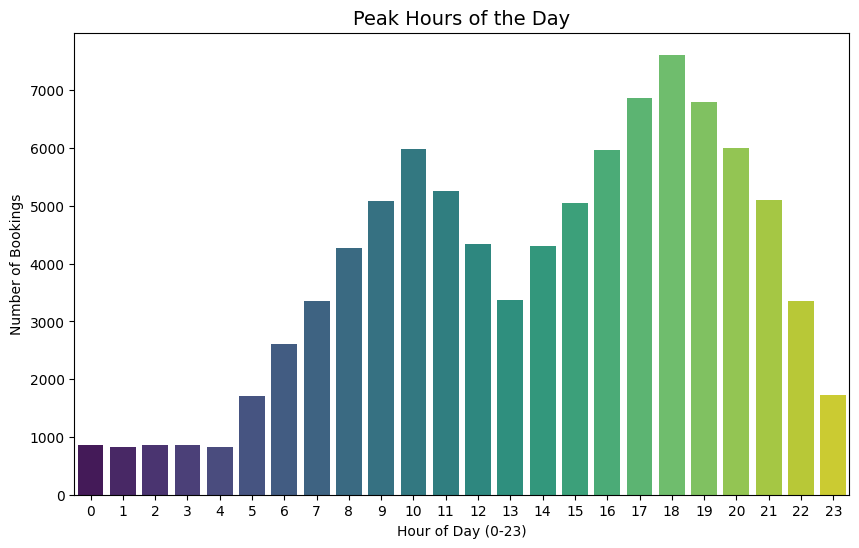

In [33]:


# تحويل عمود Time إلى صيغة وقت
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# استخراج الساعة
df['Hour'] = df['Time'].dt.hour

# عدد الرحلات لكل ساعة
hourly_rides = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=hourly_rides.index, y=hourly_rides.values, palette="viridis")

plt.title("Peak Hours of the Day", fontsize=14)
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of Bookings")
plt.xticks(range(0,24))  # يعرض الساعات من 0 لـ 23
plt.show()


C:\Users\thela\AppData\Local\Temp\ipykernel_21388\3694004023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Driver Ratings", y="Customer Rating", data=df, palette="Set2")


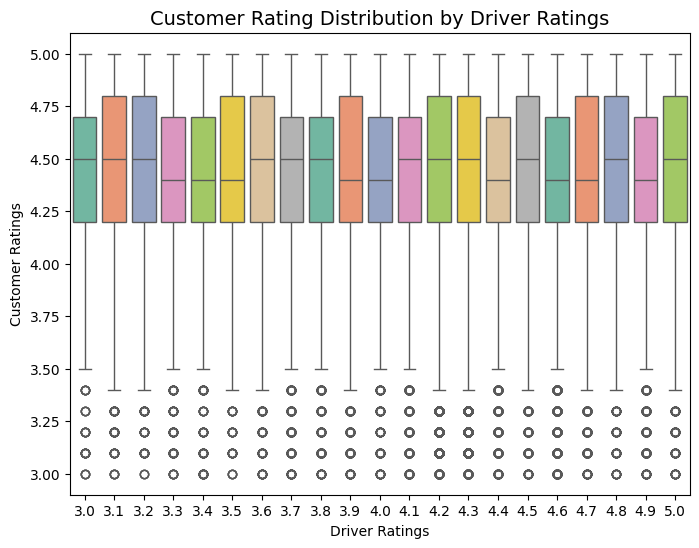

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Driver Ratings", y="Customer Rating", data=df, palette="Set2")
plt.title("Customer Rating Distribution by Driver Ratings", fontsize=14)
plt.xlabel("Driver Ratings")
plt.ylabel("Customer Ratings")
plt.show()


C:\Users\thela\AppData\Local\Temp\ipykernel_21388\540597013.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




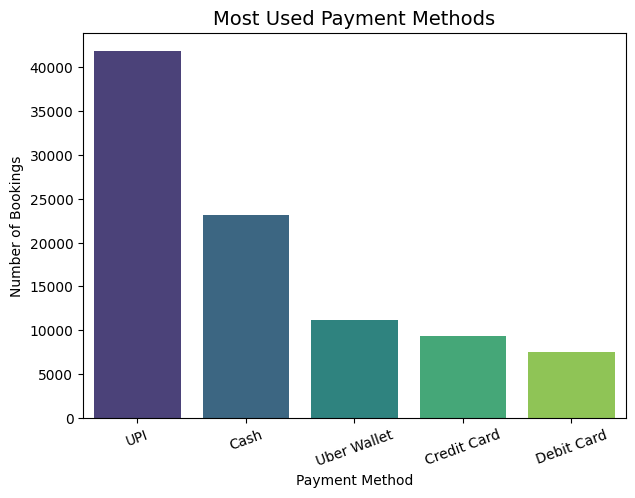

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# حساب تكرار طرق الدفع
Payment_Counts = df['Payment Method'].value_counts()

# رسم بياني شريطي
plt.figure(figsize=(7,5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")

plt.title("Most Used Payment Methods", fontsize=14)
plt.xlabel("Payment Method")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=20)
plt.show()
